In [26]:
# Importing important libraries
import numpy as np 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Extracting the dataset
boston_dataset = load_boston()

In [4]:
# Printing keys
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
# data: contains the information for various houses
# target: prices of the house
# feature_names: names of the features
# DESCR: describes the dataset

In [6]:
# Extracting the information in DESCR
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [ ]:
# The prices of the house indicated by the variable MEDV is our target variable. 
# The remaining variables are the feature variables based on which we will predict the value of a house.

In [7]:
# Loading the data in pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# We can see that the target value "MEDV" is missing from the data. 

In [8]:
# We will create a new column of target values and add it to the dataframe.
boston['MEDV'] = boston_dataset.target

In [9]:
# Checking for NULL values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

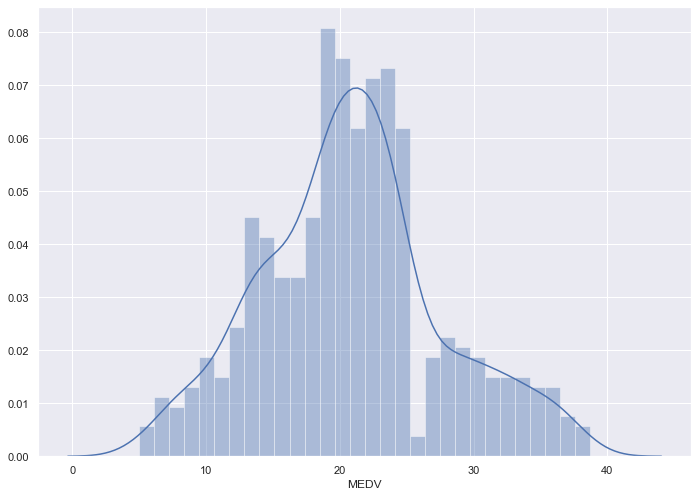

In [16]:
# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [ ]:
# We see that the values of MEDV are distributed normally with few outliers.

In [15]:
# Removing outliers
boston.drop(boston.index[list((np.where(boston['MEDV'] > 39)))],inplace = True)

/Users/pranavjaipurkar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


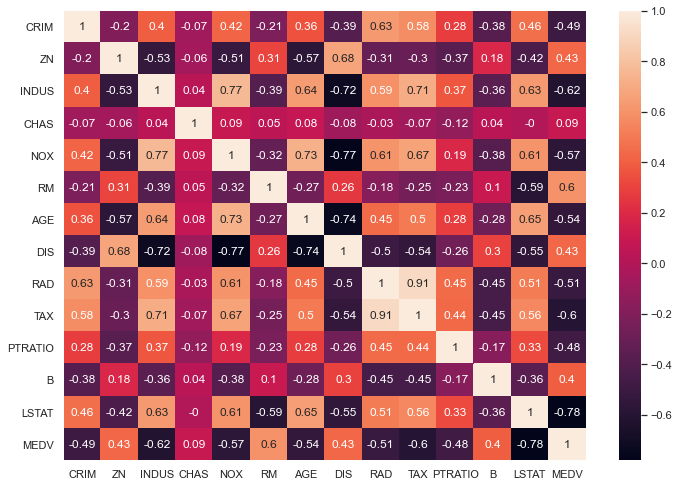

In [17]:
# Correlation Matrix
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. 
# By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.6) where as LSTAT has a high negative correlation with MEDV(-0.78).
# An important point in selecting features for a linear regression model is to check for multi-co-linearity. 
# The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. 
# We should not select both these features together for training the model.

In [ ]:
# Based on the above observations we will RM and LSTAT as our features.

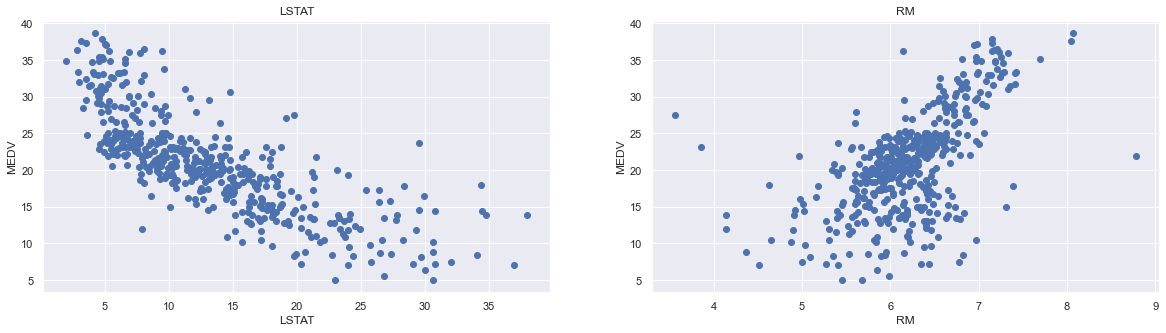

In [18]:
# Scatter Plot
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
# The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
# The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

In [19]:
# Data Preparation
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [22]:
# Splitting the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 2)
(95, 2)
(379,)
(95,)


In [23]:
# Building the Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [29]:
# Model Evaluation

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


RMSE is 4.131739946829165
R2 score is 0.6266227247659949


The model performance for testing set:


RMSE is 3.921059130225998
R2 score is 0.6462247673772591
